<a href="https://colab.research.google.com/github/Areefahnk/18K41A0505_PE_Assignment4/blob/main/PE_Pythonassgn4_1stques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Find the salary for the experience of 4.2 years and 5.2 years from the given dataset (salary_data) using simple linear regression. Train the model up to 10 iteration. And plot graph for error rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'/content/drive/My Drive/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0, 0.5, 'Salary')

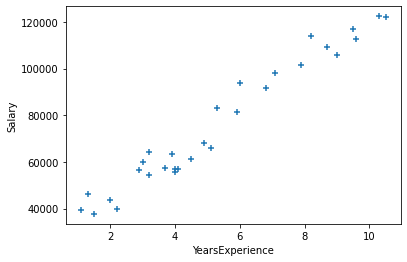

In [35]:
%matplotlib inline
plt.scatter(df.YearsExperience,df.Salary,marker='+')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [36]:
er=[]
m1=[]
c1=[]
te=[]
def compute_error(c, m, x,y):
    totalError = 0
    x = x
    y = y
    #print(c,m)
    m1.append(m)
    c1.append(c)
    for i in range(0,len(x)):
        totalError+=(((m * x[i] + c)-y[i]) ** 2)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(totalError/len(x))
    #print(er)

def step_gradient(c_current, m_current, x,y, learningRate):
    c_gradient = 0.0
    m_gradient = 0.0
    N = float(len(x))
    x = x
    y = y
    cg=[]
    mg=[]
    for i in range(0,len(x)):
        cg.append(((m_current * x[i]) + c_current)-y[i])
        mg.append(x[i] * (((m_current * x) + c_current)-y[i]))
    c_gradient=(np.array(cg).sum())/N
    m_gradient=(np.array(mg).sum())/N
    new_c = c_current - (learningRate * c_gradient)
    new_m = m_current - (learningRate * m_gradient)
    compute_error(new_c,new_m,x,y)
    return [new_c, new_m]

def gradient_descent_runner(x,y, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
    for i in range(num_iterations):
        c,m=step_gradient(c, m, x,y, learning_rate)
      #print(c,m)
   
def run():
    df = pd.read_csv(r'/content/drive/My Drive/Salary_Data.csv')
    x1=df.iloc[:,0:1]
    y1=df.iloc[:,1:2]
    x=np.array(x1)
    y=np.array(y1)
    learning_rate = 0.001
    initial_c = 1 # initial y-intercept guess
    initial_m = 1 # initial slope guess
    num_iterations = 10
    compute_error(initial_c, initial_m,x,y)
    gradient_descent_runner(x,y, initial_c, initial_m, learning_rate, num_iterations)
    


run()
it=np.arange(0,11)
#print(er)
#plt.plot(it,er)


[array([6.50184851e+09]), array([2.16091161e+08]), array([5.56540063e+08]), array([6.38537772e+08]), array([6.51956578e+08]), array([6.54269287e+08]), array([6.54877442e+08]), array([6.55226099e+08]), array([6.55535374e+08]), array([6.55838748e+08]), array([6.56141315e+08])]
1
Optimal m and c values:  14321.954654666666 76.99668666666668


Text(0, 0.5, 'Salary')

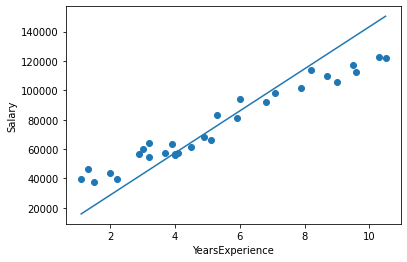

In [38]:
df = pd.read_csv(r'/content/drive/My Drive/Salary_Data.csv')
x1=df.iloc[:,0:1]
y1=df.iloc[:,1:2]
x=np.array(x1)
plt.scatter(x1,y1)
m=max(np.array(m1))
c=min(np.array(c1))
e=np.array(er)
print(er)
e1=min(e)
print(er.index(e1))
optimal_m=m1[er.index(e1)]
optimal_c=c1[er.index(e1)]
print("Optimal m and c values: ",m1[er.index(e1)],c1[er.index(e1)])
p=[]
for i in range(0,len(x1)):
    p.append(m1[er.index(e1)]*x[i]+c1[er.index(e1)])
plt.plot(x1,p)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

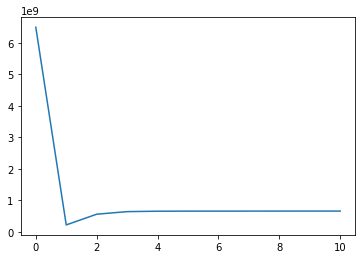

In [39]:
a=np.arange(0,11)
plt.plot(a,er)

Now as we got optimal m and c values from above: **Find the salary for the experience of 4.2 years and 5.2 years from the given dataset**

**Salary for the experience of 4.2 years**

In [22]:
optimal_m

14321.954654666666

In [23]:
optimal_c

76.99668666666668

In [28]:
print("The salary for the experience of 4.2 years: ",round((optimal_m)*(4.2)+(optimal_c)))

The salary for the experience of 4.2 years:  60229.0


**Salary for the experience of 5.2 years:**

In [33]:
print("The salary for the experience of 5.2 years: ",round((optimal_m)*(5.2)+(optimal_c)))

The salary for the experience of 5.2 years:  74551.0


**Generalized prediction:**

In [31]:
exp=float(input("Enter the experience to predict salary:"))
print("The salary predicted: ",round((optimal_m)*(exp)+(optimal_c)))

Enter the experience to predict salary:5.2
The salary predicted:  74551.0
